In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from pymoo.factory import get_performance_indicator

In [2]:
## establish up data paths
results_dir = "./log_data/"
result_dirs = sorted(os.listdir("./log_data/"))

pkl_dir = "./pkl_data/"
pkl_filename = pkl_dir+'results.pkl'
if not os.path.isdir(pkl_dir):
    os.makedirs(pkl_dir)

In [3]:
try:
    with open(pkl_filename,'rb') as infile:
        results = pickle.load(infile)
    print("results loaded from ", pkl_dir)
except FileNotFoundError:
    print("Failed to find results file in {}".format(pkl_filename))
    print("Results processing should be done first by running results_processing.py")
    
try:
    assert len(results) == 7
    for result in results:
        assert len(result['log_dir']) ==31
        print(result['name'], ": All results present.")
except:
    print("not all results present")
    for result in results:
        print(result['name'], "\t", "({}\{})".format(len(result['log_dir']), 31))

results loaded from  ./pkl_data/
Mpoi : All results present.
ParEgo : All results present.
Saf_ei : All results present.
Saf_$\mu$ : All results present.
SmsEgo_ei : All results present.
SmsEgo_$\mu$ : All results present.
lhs : All results present.


In [4]:
p = np.load(os.path.join('/home/finley/phd/code/testsuite/experiments/template/igd+_refpoints', 'wfg2_2d_refpoints'))
ref_point = np.round(p.max(axis=0))*1.1
ref_point

array([2.2, 4.4])

In [5]:
hv_measure = get_performance_indicator("hv", ref_point=ref_point)
igdp_measure = get_performance_indicator("igd+", p)

In [6]:
n_obj = p.shape[-1]
n_obj

2

In [7]:
type(results[-1])

dict

In [8]:
results[-1].keys()

dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'name', 'hpv', 'igd+'])

In [9]:
print(type(results[-1]['y']))
print(len(results[-1]['y']))
print(np.shape(results[-1]['y'][0]))
# print(results[-1]['y'][0][-1])

<class 'list'>
31
(241,)


In [10]:
D['Mpoi'].keys()

NameError: name 'D' is not defined

In [ ]:
D = {}
for result in tqdm(results):
    print(result['name'])
    y = np.array(result['y'])

    if result['name'] == 'lhs':
        hvs = np.zeros((y.shape[0], y.shape[1]+10))
        igdps = np.zeros((y.shape[0], y.shape[1]+10))
        for i, yi in tqdm(enumerate(y)):
            for j, yii in enumerate(yi):
                hvs[i, j+10] = hv_measure.calc(yii)
                igdps[i, j+10] = igdp_measure.calc(yii)
    else:
        hvs = np.zeros((y.shape[0], y.shape[1]))
        igdps = np.zeros((y.shape[0], y.shape[1]))
        for i, yi in tqdm(enumerate(y)):
            for j in range(1, y.shape[1]+1):
                hvs[i, j-1] = hv_measure.calc(yi[:j])
                igdps[i, j-1] = igdp_measure.calc(yi[:j])
                
    D[result['name']] = {'name':result['name'], 'hypervolume': hvs, 'igd+':igdps}

  0%|          | 0/7 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Mpoi

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False




1it [00:06,  6.81s/it]
2it [00:13,  6.89s/it]
3it [00:20,  6.72s/it]
4it [00:27,  6.86s/it]
5it [00:34,  6.95s/it]
6it [00:41,  6.93s/it]
7it [00:48,  6.99s/it]
8it [00:54,  6.82s/it]
9it [01:01,  6.86s/it]
10it [01:08,  6.67s/it]
11it [01:14,  6.70s/it]
12it [01:21,  6.79s/it]
13it [01:28,  6.83s/it]
14it [01:34,  6.58s/it]
15it [01:41,  6.45s/it]
16it [01:47,  6.34s/it]
17it [01:53,  6.32s/it]

In [223]:
D.keys()

dict_keys(['Mpoi', 'ParEgo', 'Saf_ei', 'Saf_$\\mu$', 'SmsEgo_ei', 'SmsEgo_$\\mu$', 'lhs'])

In [306]:
def plot_measure(ax, mes, D, name, c):
    y = D[mes]
    ax.plot(range(y.shape[1]), np.median(y, axis=0), linestyle="-", c=c, label=name)
    ax.fill_between(range(y.shape[1]), np.quantile(y, 0.25, axis=0), np.quantile(y, 0.75, axis=0), color=c, alpha=0.2)

In [225]:
from matplotlib.cm import tab10 
colors = [tab10(i) for i in range(len(results))]

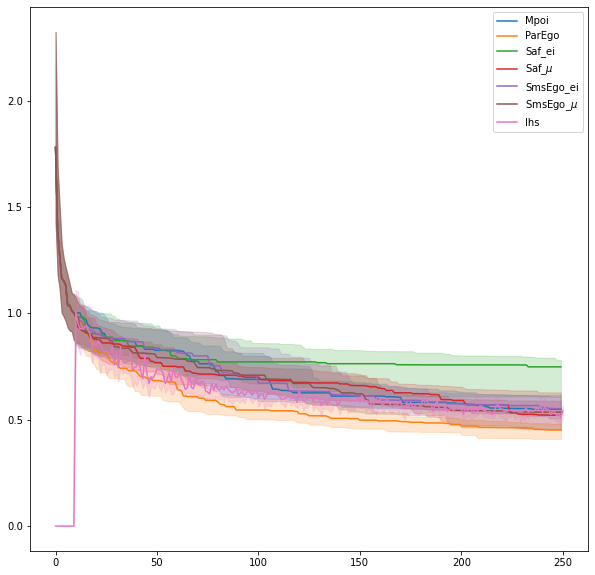

In [308]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()
for color, key, d in zip(colors, D.keys(), D.values()):
    plot_measure(ax, 'igd+', d, key, c=color)
ax.legend()

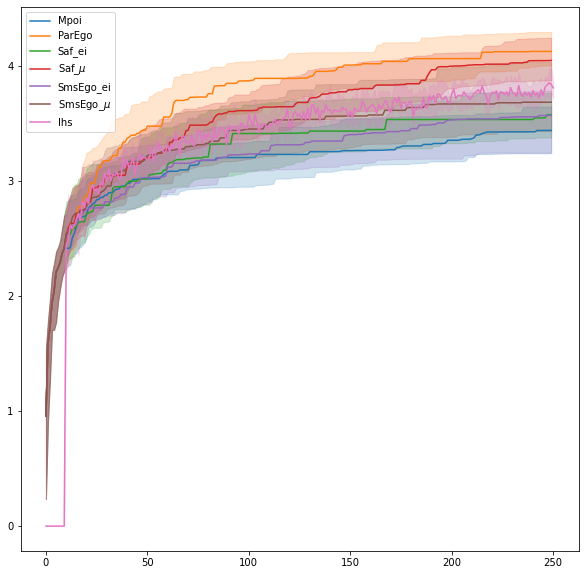

In [309]:
fig = plt.figure(figsize=[10, 10])
ax = fig.gca()
for color, key, d in zip(colors, D.keys(), D.values()):
    plot_measure(ax, 'hypervolume', d, key, c=color)
ax.legend()

In [236]:
p.shape

(1301, 2)

In [237]:
y.shape

(31, 241)

In [258]:
import lhsmdu

limits = np.array(results[0]['limits'][0][1])
limits

ss = np.array(lhsmdu.sample(numDimensions=10, numSamples=250).T)

In [298]:
ss2 = ss*limits

array([ 1.99714126,  3.9930584 ,  5.98808383,  7.97847326,  9.97206106,
       11.96355652, 13.98029362, 15.96254862, 17.97589892, 19.96937177])

In [300]:
import wfg
M = 2                                   # Number of objectives
kfactor = 4
lfactor = 3
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params

n_dim = k+l
n_obj = M
func = wfg.WFG2


In [301]:
def objective_function(x):
    if x.ndim<2:
        x = x.reshape(1,-1)
    return np.array([func(xi, k, M) for xi in x])


In [302]:
ss_scat = objective_function(ss2)

In [284]:
abc = wfg.random_soln(k, l, func.__name__)
abc.shape

(10,)

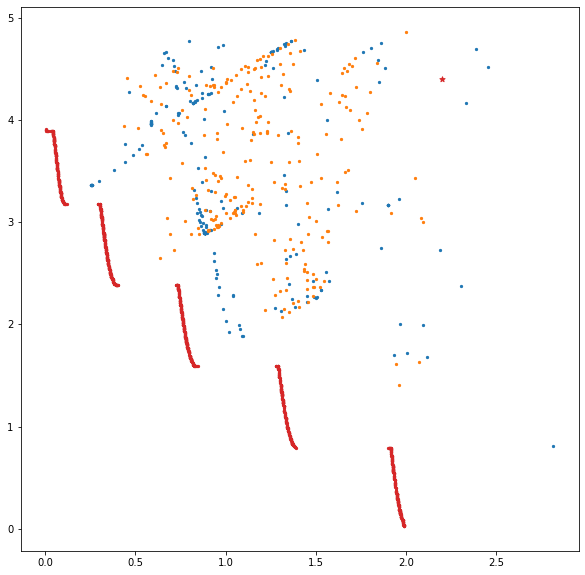

In [305]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca()
ax.scatter(*p.T, c="C3", s=5)
ax.scatter(*ref_point, c="C3", marker="*", s=30)
ax.scatter(*results[0]['y'][0].T, s=5, c="C0")
# ax.scatter(*results[-1]['y'][5][-1].T, s=5, c="C2")
ax.scatter(*ss_scat.T, s=5, c="C1")

In [250]:
results[-1]['name']

'lhs'

In [239]:
hvs.shape

(31, 251)

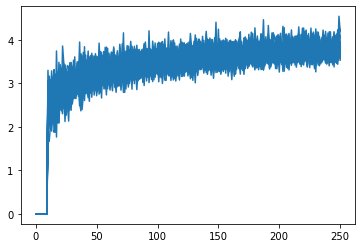

In [240]:
fig = plt.figure()
ax = fig.gca()
for hv in hvs:
    ax.plot(range(len(hv)), hv, c="C0")

In [112]:
tv = np.prod(ref_point)
tv

9.680000000000001

In [113]:
pv = hv_measure.calc(p)/tv
pv

0.634367167293033

In [114]:
# fig_hv = plt.figure()
# ax_hv = fig_hv.gca()
ax_hv.plot(range(len(hv)), np.median(hvs/tv, axis=0), c="C1", label=result['name'])
ax_hv.plot(range(len(hv)), np.quantile(hvs/tv, 0.25, axis=0), linestyle="--", c="C1")
ax_hv.plot(range(len(hv)), np.quantile(hvs/tv, 0.75, axis=0), linestyle="--", c="C1")
ax_hv.axhline(pv, c="C3")

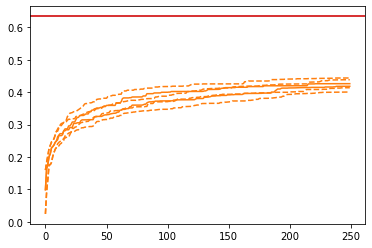

In [116]:
fig_hv

In [115]:
# fig_ig = plt.figure()
# ax_ig = fig_ig.gca()
ax_ig.plot(range(len(hv)), np.median(igdps, axis=0), c="C1", label=result['name'])
ax_ig.plot(range(len(hv)), np.quantile(igdps, 0.25, axis=0), linestyle="--", c="C1")
ax_ig.plot(range(len(hv)), np.quantile(igdps, 0.75, axis=0), linestyle="--", c="C1")

In [118]:
fig_ig.legend()

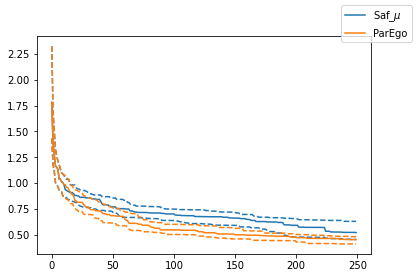

In [119]:
fig_ig

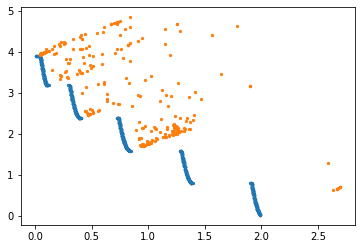

In [123]:
plt.scatter(*p.T, s=5)
plt.scatter(*y[0].T, c="C1", s=5)

In [93]:
result['name']

'Saf_$\\mu$'

In [38]:
np.median(hvs, axis=0).shape

(250,)

In [34]:
np.quantile(hvs, 0.25, axis=0).shape

(250,)

In [39]:
len(hvs)

31